In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, load_model

In [20]:
PATH_MODEL = 'saved_models/cifar10.h5'

In [21]:
# load cifar10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# divide by 255 (rgb color)
x_train, x_test = x_train/255, x_test/255

# preview data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


In [22]:
# convert y-values' dimensions
y_train, y_test = np.squeeze(y_train, -1), np.squeeze(y_test, -1)

# preview x data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000,)
y_test shape:  (10000,)


In [23]:
# get & display number of classes
k_train, k_test = len(set(y_train)), len(set(y_test))
print('y_train classes: ', k_train)
print('y_test classes: ', k_test)

y_train classes:  10
y_test classes:  10


In [24]:
# build model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k_train, activation='softmax')(x)

model = Model(i, x)

In [25]:
# compile & fit model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

# save model
# model.save(PATH_MODEL)

# load model
# model = load_model(PATH_MODEL)

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5812 - accuracy: 0.4217 - val_loss: 1.3092 - val_accuracy: 0.5267
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2989 - accuracy: 0.5306 - val_loss: 1.1492 - val_accuracy: 0.5902
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1715 - accuracy: 0.5797 - val_loss: 1.0791 - val_accuracy: 0.6119
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0807 - accuracy: 0.6130 - val_loss: 1.0110 - val_accuracy: 0.6406
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0012 - accuracy: 0.6441 - val_loss: 0.9821 - val_accuracy: 0.6576
Epoch 6/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9491 - accuracy: 0.6642 - val_loss: 0.9412 - val_accuracy: 0.6692
Epoch 7/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8948 - accuracy: 0.6823 - val_loss: 0.9270 - val_ac

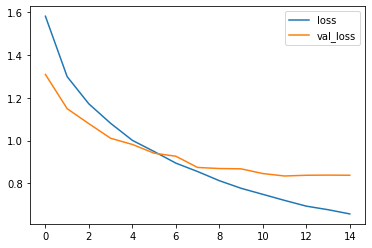

In [26]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

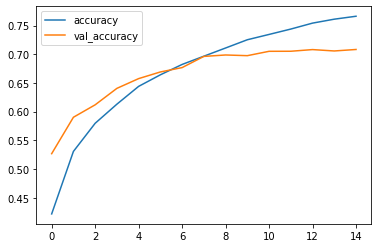

In [27]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()